In [316]:
import sys
print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


In [317]:
pip install pandas==1.2.3


The following command must be run outside of the IPython shell:

    $ pip install pandas==1.2.3

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [390]:
import numpy as np
print(np.__version__)

1.16.3


In [318]:
import sys
sys.path.append('.')

In [319]:
lambda1 = 0.6
lambda2 = 0.02

In [320]:
import pandas as pd
from scipy import stats
import numpy as np
import csv
# read in gene names and store as a list
# with open('geneName_bulk_patho_2.txt', 'r') as f:
#     gene_names = [line.strip() for line in f]
with open('geneName_bulk_patho_2.txt', 'r') as file:
    gene_names = file.read().split('\n')

# read in data for cases and controls
df_cases = pd.read_csv('data_grp_1_patho_2.txt', header=None, sep='\t')
df_controls = pd.read_csv('data_grp_0_patho_2.txt', header=None, sep='\t')

# perform t-test for each gene and select those with p-value < 0.01
significant_genes = []
for i, gene in enumerate(gene_names):
    case_data = df_cases.iloc[i,:]
    control_data = df_controls.iloc[i,:]
    _, p_value = stats.ttest_ind(case_data, control_data)
    if p_value < 0.001:
        significant_genes.append(gene)

print(len(significant_genes))
# extract data for significant genes and save to new files
gene_indices = [i for i in range(len(gene_names)) if gene_names[i] in significant_genes]
significant_cases = df_cases.iloc[gene_indices,:]
significant_controls = df_controls.iloc[gene_indices,:]

np.savetxt('case.txt', significant_cases.values, delimiter='\t')
np.savetxt('control.txt', significant_controls.values, delimiter='\t')

# print significant genes with corresponding p-values
for gene in significant_genes:
    print(f"{gene}\t{p_value}")

# save selected gene names to genename.txt
with open('genename.txt', 'w') as f:
    for gene in significant_genes:
        f.write(f"{gene}\n")

352
A2M	0.03409205669987096
ABI3BP	0.03409205669987096
ACTN4	0.03409205669987096
ACTR2	0.03409205669987096
ACTR3	0.03409205669987096
ADGRE5	0.03409205669987096
ADH5	0.03409205669987096
ADIPOQ	0.03409205669987096
ADIRF	0.03409205669987096
AEBP1	0.03409205669987096
AFM	0.03409205669987096
AIF1	0.03409205669987096
AKAP12	0.03409205669987096
ALDH1B1	0.03409205669987096
ALDH2	0.03409205669987096
ALDH6A1	0.03409205669987096
ALDH7A1	0.03409205669987096
ALDH9A1	0.03409205669987096
AMBP	0.03409205669987096
ANPEP	0.03409205669987096
ANXA11	0.03409205669987096
ANXA6	0.03409205669987096
AP1B1	0.03409205669987096
APOB	0.03409205669987096
APOC1	0.03409205669987096
APOD	0.03409205669987096
APOE	0.03409205669987096
APOH	0.03409205669987096
APOL1	0.03409205669987096
APOM	0.03409205669987096
ARHGDIB	0.03409205669987096
ARPC1A	0.03409205669987096
ARPC1B	0.03409205669987096
ARPC3	0.03409205669987096
ARPC5	0.03409205669987096
ASPN	0.03409205669987096
ATP5PD	0.03409205669987096
ATP6V0D1	0.03409205669987096


In [321]:
import os
import math
import numpy as np
from tqdm import tqdm
## TODO: auto install sklearn or write our own standarscaler
from sklearn.preprocessing import StandardScaler

import networkx as nx
import matplotlib.pyplot as plt



class DDN:
    def __init__(self):
        print("DNN package")
    
    def readGeneName(self, filename):
        with open(filename, 'r') as file:
            genename = file.read().split('\n')
        while len(genename) > 0 and genename[-1] == '':
            genename.pop()
        return genename
    
    def readGeneData(self, filename):
        genedata = np.loadtxt(filename)
        genedata = genedata.transpose()
        return genedata
    
    def standardizeGeneData(self, genedata, scaler='rms', zero_mean=True):
        # sample standardization : z = (x - u) / s
        
        standarddata = np.zeros(genedata.shape)
        for i in range(genedata.shape[1]):
            # mean value
            u = np.mean(genedata[:, i]) if not zero_mean else 0
            
            if scaler == 'std':
                # standard deviation
                s = np.std(genedata[:, i])
            elif scaler == 'rms':
                # root mean square
                s = np.sqrt(np.mean(np.square(genedata[:, i])))
            else:
                s = 1
            
            standarddata[:, i] = (genedata[:, i] - u) / s
        
        return standarddata
    
    def concatenateGeneData(self, controldata, casedata, method='diag'):
        if method == 'row':
            return np.concatenate((controldata, casedata), axis=0)
        elif method == 'col':
            return np.concatenate((controldata, casedata), axis=1)
        elif method == 'diag':
            return np.concatenate((np.concatenate((controldata, casedata * 0), axis=0), 
                                   np.concatenate((controldata * 0 ,casedata), axis=0)), axis=1)
        else:
            return []
    
    def solve2d(self, rho1, rho2, lambda1, lambda2):
        """
        description
        
        input
        output:
        cite: 
        
        """
        
        # initialize output
        area_index = 0
        beta1 = 0
        beta2 = 0
        
        if (rho2 <= (rho1 + 2*lambda2) and rho2 >= (rho2 - 2*lambda2) and rho2 >= (2*lambda1 - rho1)):
            area_index = 1
            beta1 = (rho1 + rho2)/2 - lambda1
            beta2 = (rho1 + rho2)/2 - lambda1
        elif (rho2 > (rho1 + 2*lambda2) and rho1 >= (lambda1 - lambda2)):
            area_index = 2
            beta1 = rho1 - lambda1 + lambda2
            beta2 = rho2 - lambda1 - lambda2
        elif (rho1 < (lambda1 - lambda2) and rho1 >= -(lambda1 + lambda2) and rho2 >= (lambda1 + lambda2)):
            area_index = 3
            beta1 = 0
            beta2 = rho2 - lambda1 - lambda2
        elif (rho1 < -(lambda1 + lambda2) and rho2 >= (lambda1 + lambda2)):
            area_index = 4
            beta1 = rho1 + lambda1 + lambda2
            beta2 = rho2 - lambda1 - lambda2
        elif (rho1 < -(lambda1 + lambda2) and rho2 < (lambda1 + lambda2) and rho2 >= -(lambda1 + lambda2)):
            area_index = 5
            beta1 = rho1 + lambda1 + lambda2
            beta2 = 0
        elif (rho2 < -(lambda1 - lambda2) and rho2 >= (rho1 + 2*lambda2)):
            area_index = 6
            beta1 = rho1 + lambda1 + lambda2
            beta2 = rho2 + lambda1 - lambda2
        elif (rho2 >= (rho1 - 2*lambda2) and rho2 < (rho1 + 2*lambda2) and rho2 <= (-2*lambda1 - rho1)):
            area_index = 7
            beta1 = (rho1 + rho2)/2 + lambda1
            beta2 = (rho1 + rho2)/2 + lambda1
        elif (rho2 < (rho1 - 2*lambda2) and rho1 <= -(lambda1 - lambda2)):
            area_index = 8
            beta1 = rho1 + lambda1 - lambda2
            beta2 = rho2 + lambda1 + lambda2
        elif (rho1 <= (lambda1 + lambda2) and rho1 >= -(lambda1 - lambda2) and rho2 <= -(lambda1 + lambda2)):
            area_index = 9
            beta1 = 0
            beta2 = rho2 + lambda1 + lambda2
        elif (rho1 > (lambda1 + lambda2) and rho2 <= -(lambda1 + lambda2)):
            area_index = 10
            beta1 = rho1 - lambda1 - lambda2
            beta2 = rho2 + lambda1 + lambda2
        elif (rho2 > -(lambda1 + lambda2) and rho2 <= (lambda1 - lambda2) and rho1 >= (lambda1 + lambda2)):
            area_index = 11
            beta1 = rho1 - lambda1 - lambda2
            beta2 = 0
        elif (rho2 > (lambda1 - lambda2) and rho2 < (rho1 - 2*lambda2)):
            area_index = 12
            beta1 = rho1 - lambda1 - lambda2
            beta2 = rho2 - lambda1 + lambda2
        
        return [beta1, beta2]
    
    def bcdResi(self, X1, X2, CurrIdx, lambda1, lambda2, threshold, max_iter):
        if (X1.shape[1] != X2.shape[1]):
            return []
        
        p = X1.shape[1]
        n1 = X1.shape[0]
        n2 = X2.shape[0]
        beta1 = np.zeros(p)
        beta2 = np.zeros(p)
        
        y1_resi = X1[:, CurrIdx]
        y2_resi = X2[:, CurrIdx]
        
        r = 0
        k_last = CurrIdx
        while True:
            beta1_old = np.copy(beta1)
            beta2_old = np.copy(beta2)
            
            for i in range(p):
                if i == CurrIdx:
                    continue
                
                r = r + 1
                k = i
                
                y1_resi = y1_resi - beta1[k_last] * X1[:, k_last] + beta1[k] * X1[:, k]
                y2_resi = y2_resi - beta2[k_last] * X2[:, k_last] + beta2[k] * X2[:, k]
                rho1 = np.sum(y1_resi * X1[:, k]) / n1
                rho2 = np.sum(y2_resi * X2[:, k]) / n2
                
                beta2d = self.solve2d(rho1, rho2, lambda1, lambda2)
                beta1[k] = beta2d[0]
                beta2[k] = beta2d[1]
                
                k_last = k
            
            betaerr = np.mean(np.abs(np.concatenate([beta1 - beta1_old, beta2 - beta2_old])))
            if (betaerr < threshold) or (r > max_iter):
                break
        
        beta = np.concatenate([beta1, beta2])
        return beta
    
    def generateDifferentialNetwork(self, case_data, control_data, genename, lambda1=lambda1, lambda2=lambda2, threshold=1e-6, max_iter=1e4):
        # feature size (gene size)
        p = control_data.shape[1]
        
        # sample size
        n1 = control_data.shape[0]
        n2 = case_data.shape[0]
        
        # start calculations
        diffedges = {}
        for gene in tqdm(range(p)):
            # choose one gene as target
            y = self.concatenateGeneData(control_data[:, gene], case_data[:, gene], method='row')
            
            # choose other genes as feature
            idx = [i for i in range(p) if i != gene]
            X = self.concatenateGeneData(control_data[:, idx], case_data[:, idx], method='diag')
            
            # perform bcd algorithm
            beta = self.bcdResi(control_data, case_data, gene,lambda1, lambda2, threshold, max_iter)
            
            # reindex the features
            beta1 = np.array(beta[:p])
            beta2 = np.array(beta[p:])
            
            # construct neighbours under two conditions
            condition1 = [genename[i] for i in range(p) if beta1[i] != 0 and beta2[i] == 0]
            condition2 = [genename[i] for i in range(p) if beta2[i] != 0 and beta1[i] == 0]
            weight1 = [beta1[i] for i in range(p) if beta1[i] != 0 and beta2[i] == 0]
            weight2 = [beta2[i] for i in range(p) if beta2[i] != 0 and beta1[i] == 0]
            
            # update results
            for neighbors, weights, condition in zip([condition1, condition2], [weight1, weight2], ['condition1', 'condition2']):
                for neighbor, weight in zip(neighbors, weights):
                    tuple_diffedge = (min(genename[gene], neighbor), max(genename[gene], neighbor), condition)
                    diffedges.setdefault(tuple_diffedge, 0.0)
                    diffedges[tuple_diffedge] += weight
        
        diffedges = sorted([k + tuple([v]) for k, v in diffedges.items()])
        
        return diffedges
    
    def plotDifferentialNetwork(self, diffedges, maxalpha=1.0, minalpha=0.2):
        G = nx.Graph()
        color_condition = {'condition1': [1, 0, 0], 'condition2': [0, 0, 1]}
        maxbeta = max([beta for _, _, _, beta in diffedges])
        
        for gene1, gene2, condition, beta in diffedges:
            if condition in color_condition:
                alpha = beta / maxbeta * (maxalpha - minalpha) + minalpha
                color = list(1 - (1 - np.array(color_condition[condition])) * alpha)
                G.add_edge(gene1, gene2, color=color)
        
        # Count the number of nodes in the graph and print the result
        node_count = G.number_of_nodes()
        print("Number of nodes:", node_count)
        # Count the number of edges in the graph and print the result
        edge_count = G.number_of_edges()
        print("Number of edges:", edge_count)
        
        # Find the top 100 nodes with the most edges
        top100_diff_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:100]
        print("task1_Top 100 nodes with the most edges:", top100_diff_nodes)

        # Save the top 100 nodes with the most edges as a CSV file
        with open('task1_top100_differential_nodes.csv', 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(['Node', 'Degree'])
            for node, degree in top100_diff_nodes:
                csv_writer.writerow([node, degree])

        
        pos = nx.circular_layout(G)
        #pos = nx.random_layout(G)
        #pos = nx.spring_layout(G)
        edges = G.edges()
        edge_color = [G[u][v]['color'] for u, v in edges]
        node_size = [d * 200 for n, d in G.degree()]
        
        fig, ax = plt.subplots(figsize=(30, 30))
        nx.draw(G, pos=pos, node_color='lightblue', node_size=node_size, \
                edges=edges, edge_color=edge_color, width=3, \
                with_labels=True, font_size=15, font_weight='normal', font_color='magenta')
        
        ax.set_xlim((-1.2, +1.2))
        ax.set_ylim(ax.get_xlim())
        ax.set_title(''.join([
            'DDN Network\n', 
            '\n', 
            'condition #1: red edge\n', 
            'condition #2: blue edge'
        ]))
        plt.savefig('figure1.jpg')
        plt.show()
    
    def printDifferentialNetwork(self, diffedges, filename=''):
        if len(filename) == 0:
            for gene, neighbor, condition, weight in diffedges:
                print(f"{gene},{neighbor},{condition},{weight}")
        else:
            with open(filename, 'w') as file:
                for gene, neighbor, condition, weight in diffedges:
                    file.write(f"{gene},{neighbor},{condition},{weight}\r")
    
    def DDNPipline(self, case_data_file, control_data_file, gene_name_file, output_file='', lambda1=lambda1, lambda2=lambda2):
        # import case data
        casedata = self.readGeneData(case_data_file)
        
        # import control data
        controldata = self.readGeneData(control_data_file)
        
        # import gene name
        genename = self.readGeneName(gene_name_file)
        
        # feature size must be equivalent
        assert(casedata.shape[1] == controldata.shape[1])
        
        # feature standardization
        case_standard = self.standardizeGeneData(casedata)
        control_standard = self.standardizeGeneData(controldata)
        
        # generate differential network
        diffedges = self.generateDifferentialNetwork(case_standard, control_standard, genename, lambda1, lambda2)
        
        # print differential network
        self.printDifferentialNetwork(diffedges, output_file)
        
        return diffedges
    
    def DDNBatchPipline(self, path='.', \
                        case_data_suffix='_case.txt', \
                        control_data_suffix='_control.txt', \
                        gene_name_suffix='_genename.txt', \
                        output_suffix='_differential_network.csv', \
                        lambda1=lambda1, lambda2=lambda2):
        idx = 0
        for file in os.listdir(path):
            if file.endswith(gene_name_suffix):
                gene_name_file = os.path.join(path, file)
                
                prefix = file[:-len(gene_name_suffix)]
                case_data_file = os.path.join(path, prefix+case_data_suffix)
                control_data_file = os.path.join(path, prefix+control_data_suffix)
                output_file = os.path.join(path, prefix+output_suffix)
                
                if os.path.exists(case_data_file) and os.path.exists(control_data_file):
                    self.DDNPipline(case_data_file, control_data_file, \
                                    gene_name_file, output_file, lambda1, lambda2)
                    
                    idx += 1
                    print(f"Dataset#{idx} : {prefix}    successfully processed!")
                
        return

In [322]:
%%time

ddn = DDN()
neighbors = ddn.DDNPipline(case_data_file='case.txt', \
                           control_data_file='control.txt', \
                           gene_name_file='genename.txt', \
                           output_file='task1_differential_network.csv', \
                           lambda1=lambda1, lambda2=lambda2)
neighbors

DNN package


100%|████████████████████████████████████████████████████████████████████████████████| 352/352 [01:50<00:00,  3.18it/s]

Wall time: 1min 50s


Number of nodes: 97
Number of edges: 89
task1_Top 100 nodes with the most edges: [('LYZ', 14), ('IGHA2', 13), ('FERMT3', 12), ('ITGB3', 9), ('IGHV6-1', 4), ('FCGBP', 4), ('LPA', 3), ('HP', 3), ('PLA2G2A', 3), ('EMILIN2', 3), ('PLPP3', 3), ('MVP', 3), ('AMBP', 2), ('SAA4', 2), ('APOM', 2), ('RPS8', 2), ('CD14', 2), ('CTSB', 2), ('EEF1G', 2), ('EIF4A1', 2), ('POSTN', 2), ('EPB41L2', 2), ('FGG', 2), ('NAGK', 2), ('HSPA5', 2), ('LAMP1', 2), ('LRP1', 2), ('LTBP1', 2), ('NAMPT', 2), ('TIMP1', 2), ('STAB1', 2), ('A2M', 1), ('QSOX1', 1), ('ACTR2', 1), ('ACTR3', 1), ('AIF1', 1), ('CSK', 1), ('ANPEP', 1), ('ANXA11', 1), ('CCN5', 1), ('APOC1', 1), ('CPB2', 1), ('APOD', 1), ('APOE', 1), ('APOL1', 1), ('F2', 1), ('ARPC1A', 1), ('ARPC3', 1), ('ATRN', 1), ('C1QTNF5', 1), ('C2', 1), ('IGA2', 1), ('C4BPA', 1), ('CAPZA1', 1), ('CFH', 1), ('CPNE3', 1), ('TNC', 1), ('DAG1', 1), ('DMD', 1), ('EFEMP2', 1), ('EMILIN1', 1), ('HEXB', 1), ('JUP', 1), ('ERP44', 1), ('ESYT1', 1), ('THBS2', 1), ('GARS1', 1), ('GPX

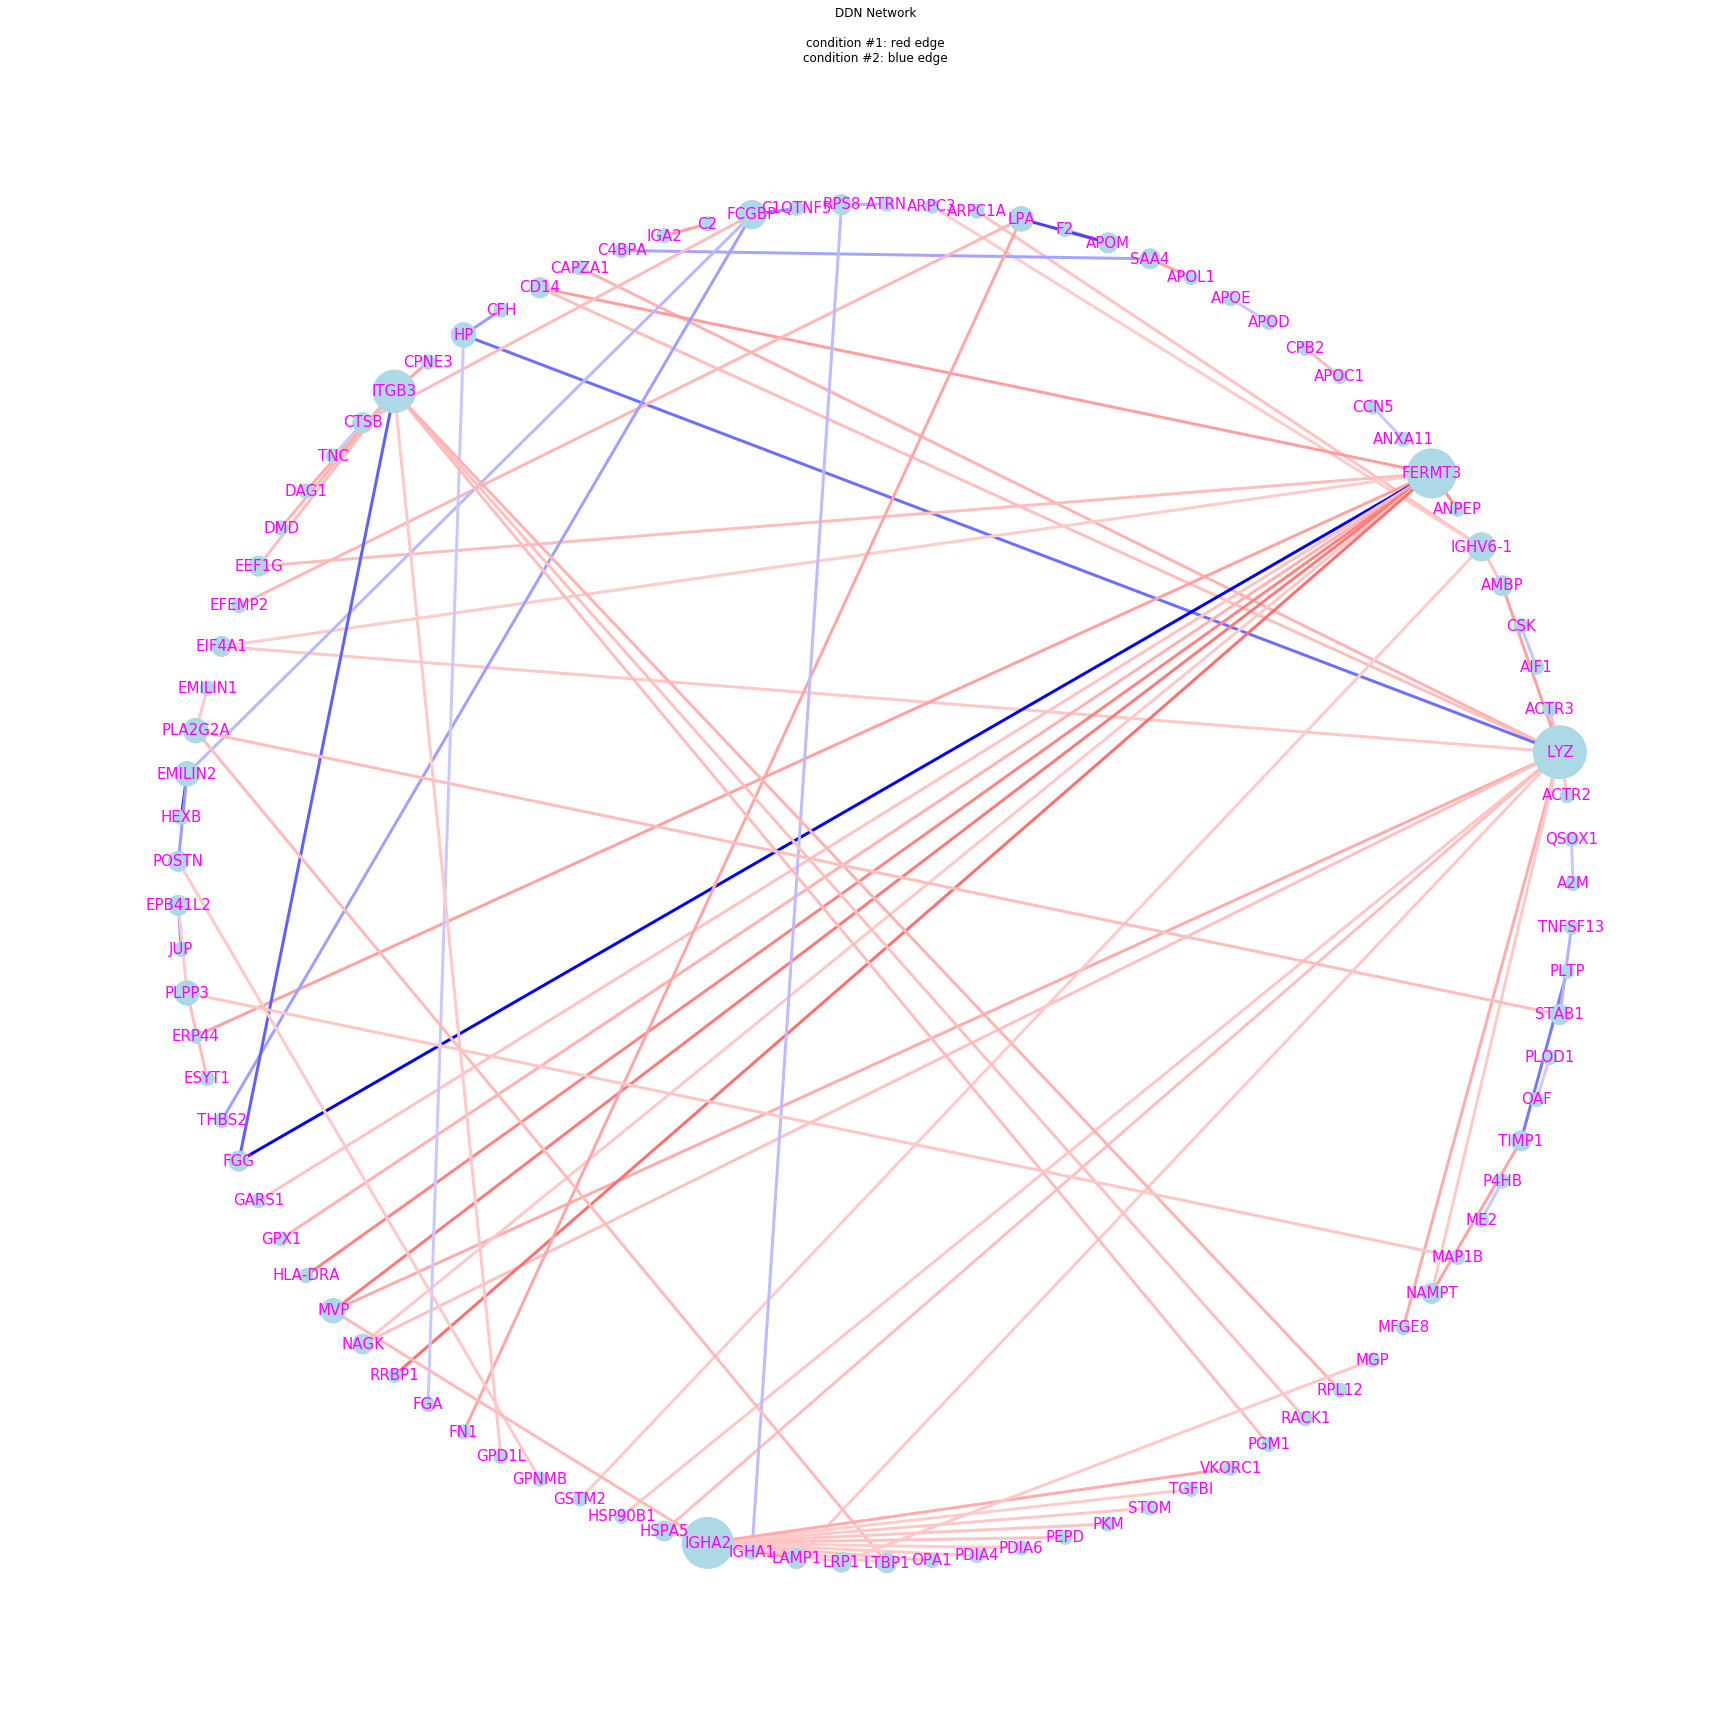

In [323]:
ddn.plotDifferentialNetwork(neighbors)

Common network parts

In [324]:
def readGeneName(filename):
    with open(filename, 'r') as file:
        genename = file.read().split('\n')
    
    while len(genename) > 0 and genename[-1] == '':
        genename.pop()
    
    return genename

In [325]:
def readGeneData(filename):
    genedata = np.loadtxt(filename)
    genedata = genedata.transpose()
    
    return genedata

In [326]:
def standardizeGeneData(genedata, zero_mean=True):
    scaler = StandardScaler(with_mean=zero_mean)
    genestandard = scaler.fit_transform(genedata)
    
    return genestandard

In [327]:
def concatenateGeneData(controldata, casedata, method='diag'):
    if method == 'row':
        return np.concatenate((controldata, casedata), axis=0)
    elif method == 'col':
        return np.concatenate((controldata, casedata), axis=1)
    elif method == 'diag':
        return np.concatenate((np.concatenate((controldata, casedata * 0), axis=0), 
                               np.concatenate((controldata * 0 ,casedata), axis=0)), axis=1)
    else:
        return []

In [328]:
max_iter=1e4

In [329]:
def solve2d(rho1, rho2, lambda1, lambda2):
    """
    description
    
    input
    output:
    cite: 
    
    """
    
    # initialize output
    area_index = 0
    beta1 = 0
    beta2 = 0
    
    if (rho2 <= (rho1 + 2*lambda2) and rho2 >= (rho2 - 2*lambda2) and rho2 >= (2*lambda1 - rho1)):
        area_index = 1
        beta1 = (rho1 + rho2)/2 - lambda1
        beta2 = (rho1 + rho2)/2 - lambda1
    
    elif (rho2 > (rho1 + 2*lambda2) and rho1 >= (lambda1 - lambda2)):
        area_index = 2
        beta1 = rho1 - lambda1 + lambda2
        beta2 = rho2 - lambda1 - lambda2
    
    elif (rho1 < (lambda1 - lambda2) and rho1 >= -(lambda1 + lambda2) and rho2 >= (lambda1 + lambda2)):
        area_index = 3
        beta1 = 0
        beta2 = rho2 - lambda1 - lambda2
    
    elif (rho1 < -(lambda1 + lambda2) and rho2 >= (lambda1 + lambda2)):
        area_index = 4
        beta1 = rho1 + lambda1 + lambda2
        beta2 = rho2 - lambda1 - lambda2
    
    elif (rho1 < -(lambda1 + lambda2) and rho2 < (lambda1 + lambda2) and rho2 >= -(lambda1 + lambda2)):
        area_index = 5
        beta1 = rho1 + lambda1 + lambda2
        beta2 = 0
    
    elif (rho2 < -(lambda1 - lambda2) and rho2 >= (rho1 + 2*lambda2)):
        area_index = 6
        beta1 = rho1 + lambda1 + lambda2
        beta2 = rho2 + lambda1 - lambda2
    
    elif (rho2 >= (rho1 - 2*lambda2) and rho2 < (rho1 + 2*lambda2) and rho2 <= (-2*lambda1 - rho1)):
        area_index = 7
        beta1 = (rho1 + rho2)/2 + lambda1
        beta2 = (rho1 + rho2)/2 + lambda1
    
    elif (rho2 < (rho1 - 2*lambda2) and rho1 <= -(lambda1 - lambda2)):
        area_index = 8
        beta1 = rho1 + lambda1 - lambda2
        beta2 = rho2 + lambda1 + lambda2
    
    elif (rho1 <= (lambda1 + lambda2) and rho1 >= -(lambda1 - lambda2) and rho2 <= -(lambda1 + lambda2)):
        area_index = 9
        beta1 = 0
        beta2 = rho2 + lambda1 + lambda2
    
    elif (rho1 > (lambda1 + lambda2) and rho2 <= -(lambda1 + lambda2)):
        area_index = 10
        beta1 = rho1 - lambda1 - lambda2
        beta2 = rho2 + lambda1 + lambda2
    
    elif (rho2 > -(lambda1 + lambda2) and rho2 <= (lambda1 - lambda2) and rho1 >= (lambda1 + lambda2)):
        area_index = 11
        beta1 = rho1 - lambda1 - lambda2
        beta2 = 0
    
    elif (rho2 > (lambda1 - lambda2) and rho2 < (rho1 - 2*lambda2)):
        area_index = 12
        beta1 = rho1 - lambda1 - lambda2
        beta2 = rho2 - lambda1 + lambda2
    
    
    return [beta1, beta2]


In [330]:
def bcd(y, X, lambda1, lambda2, n1=1, n2=1, threshold=0.001):
    """
    description
    
    input:
    output:
    cite: 
    
    """
    
    # total feature size must be even
    if (X.shape[1] == 0 or X.shape[1] % 2 == 1):
        return []
    
    # feature size (gene size) for each group
    # x1 (control): feature 0 to p-1
    # x2 (case): feature p to 2*p-1
    p = X.shape[1] // 2
    
    # initialize beta
    beta = np.zeros(2 * p)
    
    if (p == 1):
        
        rho1 = np.sum(y * X[:, 0]) / n1
        rho2 = np.sum(y * X[:, 1]) / n2
        
        beta2d = solve2d(rho1, rho2, lambda1, lambda2)
        beta[0] = beta2d[0]
        beta[1] = beta2d[1]
        
        return beta
        
    else:
        
        while (True):
            beta_old = np.copy(beta)
            
            for k in range(p):
                x1 = X[:, k]
                x2 = X[:, k + p]
                
                idx = [i for i in range(2 * p) if i not in (k, k + p)]
                y_residual = y - np.dot(X[:, idx], beta[idx])
                
                rho1 = np.sum(y_residual * x1) / n1
                rho2 = np.sum(y_residual * x2) / n2
                #rho1 = np.sum(y_residual * x1) / 1
                #rho2 = np.sum(y_residual * x2) / 1
                
                beta2d = solve2d(rho1, rho2, lambda1, lambda2)
                
                beta[k] = beta2d[0]
                beta[k + p] = beta2d[1]
            
            if (np.mean(np.abs(beta - beta_old)) < threshold):
                break
        
        return beta
    

In [331]:
def bcdResi(X1, X2, CurrIdx, lambda1, lambda2, threshold, max_iter):
    if (X1.shape[1] != X2.shape[1]):
        return []
    
    p = X1.shape[1]
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    beta1 = np.zeros(p)
    beta2 = np.zeros(p)
    
    y1_resi = X1[:, CurrIdx]
    y2_resi = X2[:, CurrIdx]
    
    r = 0
    k_last = CurrIdx
    
    while True:
        beta1_old = np.copy(beta1)
        beta2_old = np.copy(beta2)
        
        for i in range(p):
            if i == CurrIdx:
                continue
            
            r = r + 1
            k = i
            
            y1_resi = y1_resi - beta1[k_last] * X1[:, k_last] + beta1[k] * X1[:, k]
            y2_resi = y2_resi - beta2[k_last] * X2[:, k_last] + beta2[k] * X2[:, k]
            rho1 = np.sum(y1_resi * X1[:, k]) / n1
            rho2 = np.sum(y2_resi * X2[:, k]) / n2
            
            beta2d = solve2d(rho1, rho2, lambda1, lambda2)
            beta1[k] = beta2d[0]
            beta2[k] = beta2d[1]
            
            k_last = k
        
        betaerr = np.mean(np.abs(np.concatenate([beta1 - beta1_old, beta2 - beta2_old])))
        if (betaerr < threshold) or (r > max_iter):
            break
    
    beta = np.concatenate([beta1, beta2])
    return beta


In [332]:
def generateCommonNetwork(case_data, control_data, genename, lambda1=lambda1, lambda2=lambda2, threshold=1e-6):
    # feature size (gene size)
    p = control_data.shape[1]

    # sample size
    n1 = control_data.shape[0]
    n2 = case_data.shape[0]

    # start calculations
    diffedges = {}
    beta1_all = []
    beta2_all = []
    for gene in tqdm(range(p)):
        # choose one gene as target
        y = concatenateGeneData(control_data[:, gene], case_data[:, gene], method='row')

        # choose other genes as feature
        idx = [i for i in range(p) if i != gene]
        X = concatenateGeneData(control_data[:, idx], case_data[:, idx], method='diag')

        # perform bcd algorithm
        beta = bcdResi(control_data, case_data, gene,lambda1, lambda2, threshold, max_iter)

        # reindex the features
        beta1 = np.array(beta[:p])
        beta1_all.append(beta1)
        beta2 = np.array(beta[p:])
        beta2_all.append(beta2)
            
            
#         # reindex the features
#         beta1 = list(beta[0 : gene]) + [0] + list(beta[gene : p - 1])
#         #beta1 = np.array(beta1)
#         beta1_all.append(beta1)
#         beta2 = list(beta[p - 1 : gene + p - 1]) + [0] + list(beta[gene + p - 1 : 2 * p - 2])
#         #beta2 = np.array(beta2)
#         beta2_all.append(beta2)
            
        # construct neighbours under two conditions
        condition1 = [genename[i] for i in range(p) if beta1[i] != 0 and beta2[i] == 0]
        condition2 = [genename[i] for i in range(p) if beta2[i] != 0 and beta1[i] == 0]
        weight1 = [beta1[i] for i in range(p) if beta1[i] != 0 and beta2[i] == 0]
        weight2 = [beta2[i] for i in range(p) if beta2[i] != 0 and beta1[i] == 0]
        

        

        # update results
        for neighbors, weights, condition in zip([condition1, condition2], [weight1, weight2], ['condition1', 'condition2']):
            for neighbor, weight in zip(neighbors, weights):
                tuple_diffedge = (min(genename[gene], neighbor), max(genename[gene], neighbor), condition)
                diffedges.setdefault(tuple_diffedge, 0.0)
                diffedges[tuple_diffedge] += weight

    diffedges = sorted([k + tuple([v]) for k, v in diffedges.items()])

    #return diffedges
    return beta1_all,beta2_all

In [333]:
def plot_common_edge(G,H1,H2):
    # common parts between two network
    Diff = nx.difference(H2, H1)
    pos = nx.circular_layout(Diff)
    nx.draw(G, pos,with_labels = True,node_color="tab:orange")
    plt.title('common parts between two network')
    plt.show()


In [334]:
genename = readGeneName('genename.txt')
print(len(genename))
genename

352


['A2M',
 'ABI3BP',
 'ACTN4',
 'ACTR2',
 'ACTR3',
 'ADGRE5',
 'ADH5',
 'ADIPOQ',
 'ADIRF',
 'AEBP1',
 'AFM',
 'AIF1',
 'AKAP12',
 'ALDH1B1',
 'ALDH2',
 'ALDH6A1',
 'ALDH7A1',
 'ALDH9A1',
 'AMBP',
 'ANPEP',
 'ANXA11',
 'ANXA6',
 'AP1B1',
 'APOB',
 'APOC1',
 'APOD',
 'APOE',
 'APOH',
 'APOL1',
 'APOM',
 'ARHGDIB',
 'ARPC1A',
 'ARPC1B',
 'ARPC3',
 'ARPC5',
 'ASPN',
 'ATP5PD',
 'ATP6V0D1',
 'ATP6V1A',
 'ATP6V1H',
 'ATRN',
 'BAX',
 'BCAM',
 'BGN',
 'C11orf96',
 'C1QTNF5',
 'C2',
 'C4BPA',
 'C8A',
 'C9',
 'CAB39L',
 'CALD1',
 'CAP1',
 'CAP2',
 'CAPG',
 'CAPZA1',
 'CASP1',
 'CAV1',
 'CAVIN1',
 'CAVIN2',
 'CAVIN3',
 'CBX3',
 'CCN5',
 'CD109',
 'CD14',
 'CD163',
 'CD5L',
 'CD99',
 'CDH13',
 'CFH',
 'CFHR2',
 'CFI',
 'CHID1',
 'CISD2',
 'CKB',
 'CLEC11A',
 'CLIC1',
 'CLU',
 'CNDP2',
 'CNN1',
 'CNN3',
 'COL15A1',
 'COL6A3',
 'COLGALT1',
 'CORO1A',
 'COTL1',
 'CPB2',
 'CPN1',
 'CPN2',
 'CPNE3',
 'CRAT',
 'CRIP2',
 'CRLF1',
 'CRYAB',
 'CSK',
 'CSRP2',
 'CTHRC1',
 'CTSB',
 'CTSC',
 'CTSD',
 'CTSG',
 

In [335]:
mapping = {}
with open("genename.txt") as f:
    for i, line in enumerate(f):
        mapping[i] = line.strip()


In [336]:
# import casedata
casedata = readGeneData('case.txt')
#casedata = casedata.transpose()

casedata.shape

(68, 352)

In [337]:
# import control
controldata = readGeneData('control.txt')
#controldata = controldata.transpose()
#print(control_raw)
controldata.shape

(223, 352)

In [338]:
case_standard = standardizeGeneData(casedata, zero_mean=True)
control_standard = standardizeGeneData(controldata, zero_mean=True)

In [339]:
concat_standard = concatenateGeneData(control_standard, case_standard)
concat_standard.shape

(291, 704)

In [340]:
def standardizeGeneData_R(genedata):
    genedatanew = np.zeros(genedata.shape)
    
    for i in range(genedata.shape[1]):
        s = np.sqrt(np.sum(np.square(genedata[:, i])))  # contain n1, n2
        genedatanew[:, i] = genedata[:, i] / s
        s = np.sqrt(np.mean(np.square(genedata[:, i]))) # not contain n1, n2
        genedatanew[:, i] = genedata[:, i] / s
        #u = np.mean(genedata[:, i])
        #s = np.std(genedata[:, i])                      # correct standardization
        #genedatanew[:, i] = (genedata[:, i] - u) / s
    
    return genedatanew

In [341]:
beta1_all,beta2_all = generateCommonNetwork(case_standard, control_standard,genename, lambda1=lambda1, lambda2=lambda2 )
beta1_all = np.array(beta1_all)
beta2_all = np.array(beta2_all)

100%|████████████████████████████████████████████████████████████████████████████████| 352/352 [00:24<00:00, 14.20it/s]


In [342]:
num_nonzero = np.count_nonzero(beta2_all)

# Print the result
print("Number of non-zero elements in beta2_all:", num_nonzero)

Number of non-zero elements in beta2_all: 502


In [343]:
num_nonzero = np.count_nonzero(beta1_all)
print("Number of non-zero elements in beta1_all:", num_nonzero)

Number of non-zero elements in beta1_all: 314


In [344]:
# H1 = nx.from_numpy_matrix(beta1_all)
# H1 = nx.relabel_nodes(H1, mapping)
# Diff = nx.difference(H1, H2)
# pos = nx.circular_layout(Diff)
# nx.draw(H1, pos, with_labels=True, node_color="tab:orange")
# plt.title('original network 1')
# plt.show()


In [345]:
# # original network 2
# H2 = nx.from_numpy_matrix(beta2_all)
# H2 = nx.relabel_nodes(H2,mapping) 
# pos = nx.circular_layout(H2)
# nx.draw(H2, pos,with_labels = True,node_color="tab:green")
# plt.title('original network 2')
# plt.show()

In [346]:
import numpy as np

# Assuming beta1_all and beta2_all are NumPy arrays
common_elements = np.intersect1d(beta1_all, beta2_all)
num_common_elements = common_elements.size

print("Number of common elements:", num_common_elements)

Number of common elements: 181


In [347]:
# # common parts between two network
# Common = nx.intersection(H1, H2)
# fig, ax = plt.subplots(figsize=(20, 20))
# pos = nx.circular_layout(Diff)
# nx.draw(Common, pos,with_labels = True,node_color="tab:orange")
# plt.title('common parts between two network')
# plt.show()


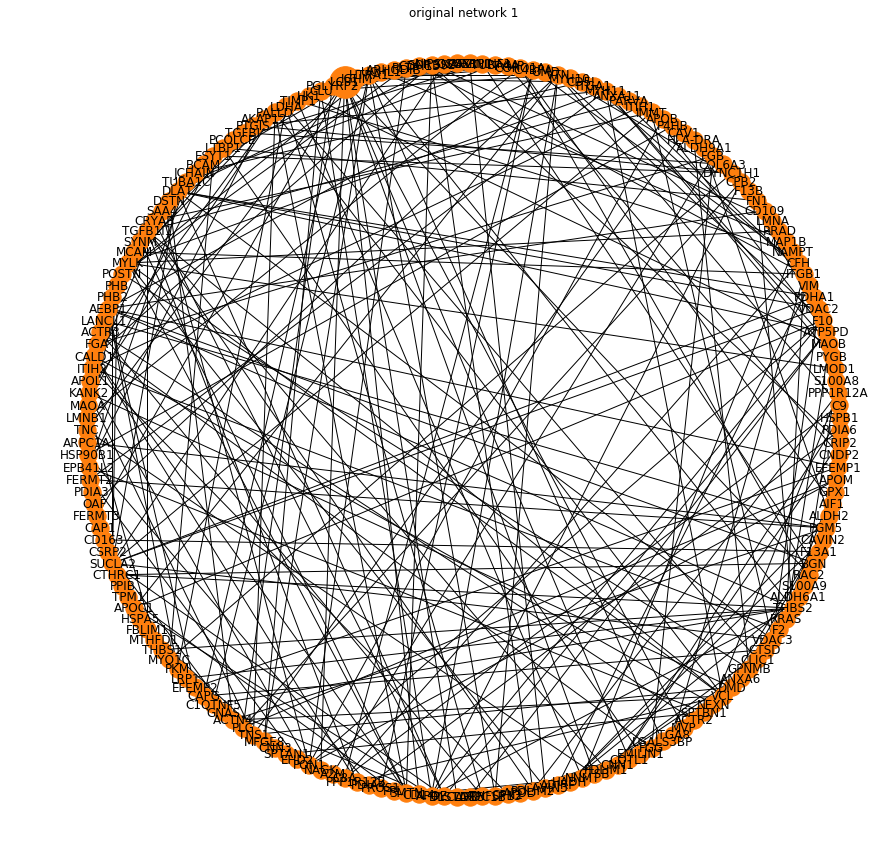

In [348]:
#original network1
H1 = nx.from_numpy_matrix(beta1_all)
H1 = nx.relabel_nodes(H1, mapping)
H2 = nx.from_numpy_matrix(beta2_all)
H2 = nx.relabel_nodes(H2, mapping)
Diff = nx.difference(H1, H2)
fig, ax = plt.subplots(figsize=(15, 15))
# get the degrees of all nodes in the graph
degrees = dict(H1.degree())

# find the node with the highest degree
node_with_most_edges = max(degrees, key=degrees.get)

# create a subgraph with only the nodes that have edges
subgraph = H1.subgraph([n for n, d in degrees.items() if d > 0])

pos = nx.circular_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color="tab:orange")
nx.draw_networkx_nodes(subgraph, pos, nodelist=[node_with_most_edges], node_color="tab:orange", node_size=1000)
plt.title('original network 1')
plt.show()

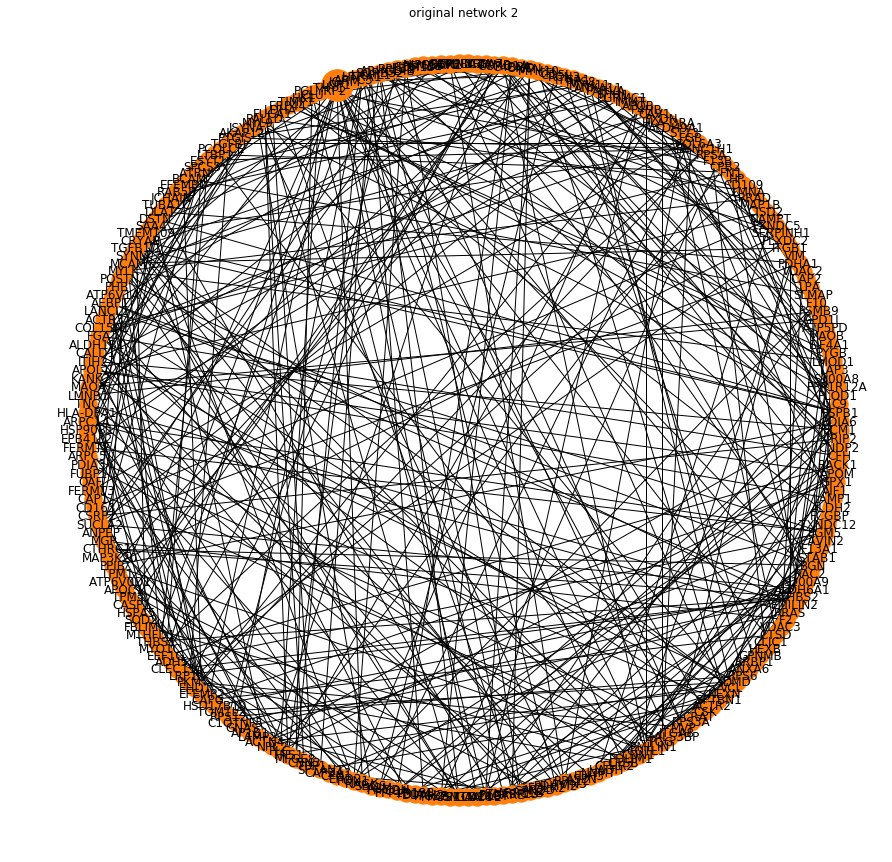

In [349]:
#original network2
H2 = nx.from_numpy_matrix(beta2_all)
H2 = nx.relabel_nodes(H2, mapping)
#Diff = nx.difference(H1, H2)
fig, ax = plt.subplots(figsize=(15, 15))
# get the degrees of all nodes in the graph
degrees = dict(H2.degree())

# find the node with the highest degree
node_with_most_edges = max(degrees, key=degrees.get)

# create a subgraph with only the nodes that have edges
subgraph2 = H2.subgraph([n for n, d in degrees.items() if d > 0])

pos = nx.circular_layout(subgraph2)
nx.draw(subgraph2, pos, with_labels=True, node_color="tab:orange")
nx.draw_networkx_nodes(subgraph, pos, nodelist=[node_with_most_edges], node_color="tab:orange", node_size=1000)
plt.title('original network 2')
plt.show()

Number of nodes: 170
Number of edges: 193
Top 100 nodes with the most edges: [('LCP1', 12), ('VTN', 10), ('PALLD', 8), ('MYLK', 7), ('VCL', 7), ('MYH11', 7), ('HTRA1', 7), ('TGFB1I1', 7), ('PON1', 7), ('THBS2', 7), ('ITGB1', 6), ('SORBS2', 6), ('PGM5', 6), ('SMTN', 5), ('APOE', 5), ('SUCLA2', 5), ('AEBP1', 5), ('MAOB', 4), ('TNS1', 4), ('FGB', 4), ('CTSB', 4), ('CALD1', 4), ('DLAT', 4), ('POSTN', 4), ('F10', 4), ('CORO1A', 4), ('HADH', 4), ('ACTN4', 4), ('PLG', 4), ('KANK2', 3), ('FGG', 3), ('CTSD', 3), ('CLU', 3), ('MYO1C', 3), ('FERMT2', 3), ('CPB2', 3), ('PDIA3', 3), ('BGN', 3), ('ESYT1', 3), ('TNC', 3), ('DYNC1H1', 3), ('EPB41L2', 3), ('ALDH2', 3), ('PYGB', 2), ('ITGA1', 2), ('C4BPA', 2), ('HSP90B1', 2), ('MCAM', 2), ('TNFSF13', 2), ('CAPG', 2), ('PHB', 2), ('TUBA1C', 2), ('MAOA', 2), ('TGFBI', 2), ('PDHA1', 2), ('IGHM', 2), ('JCHAIN', 2), ('FBLIM1', 2), ('ITIH2', 2), ('CPN2', 2), ('CRIP2', 2), ('ACTR3', 2), ('ARPC1B', 2), ('CNN1', 2), ('CAVIN3', 2), ('CD14', 2), ('NNMT', 2), ('DMD

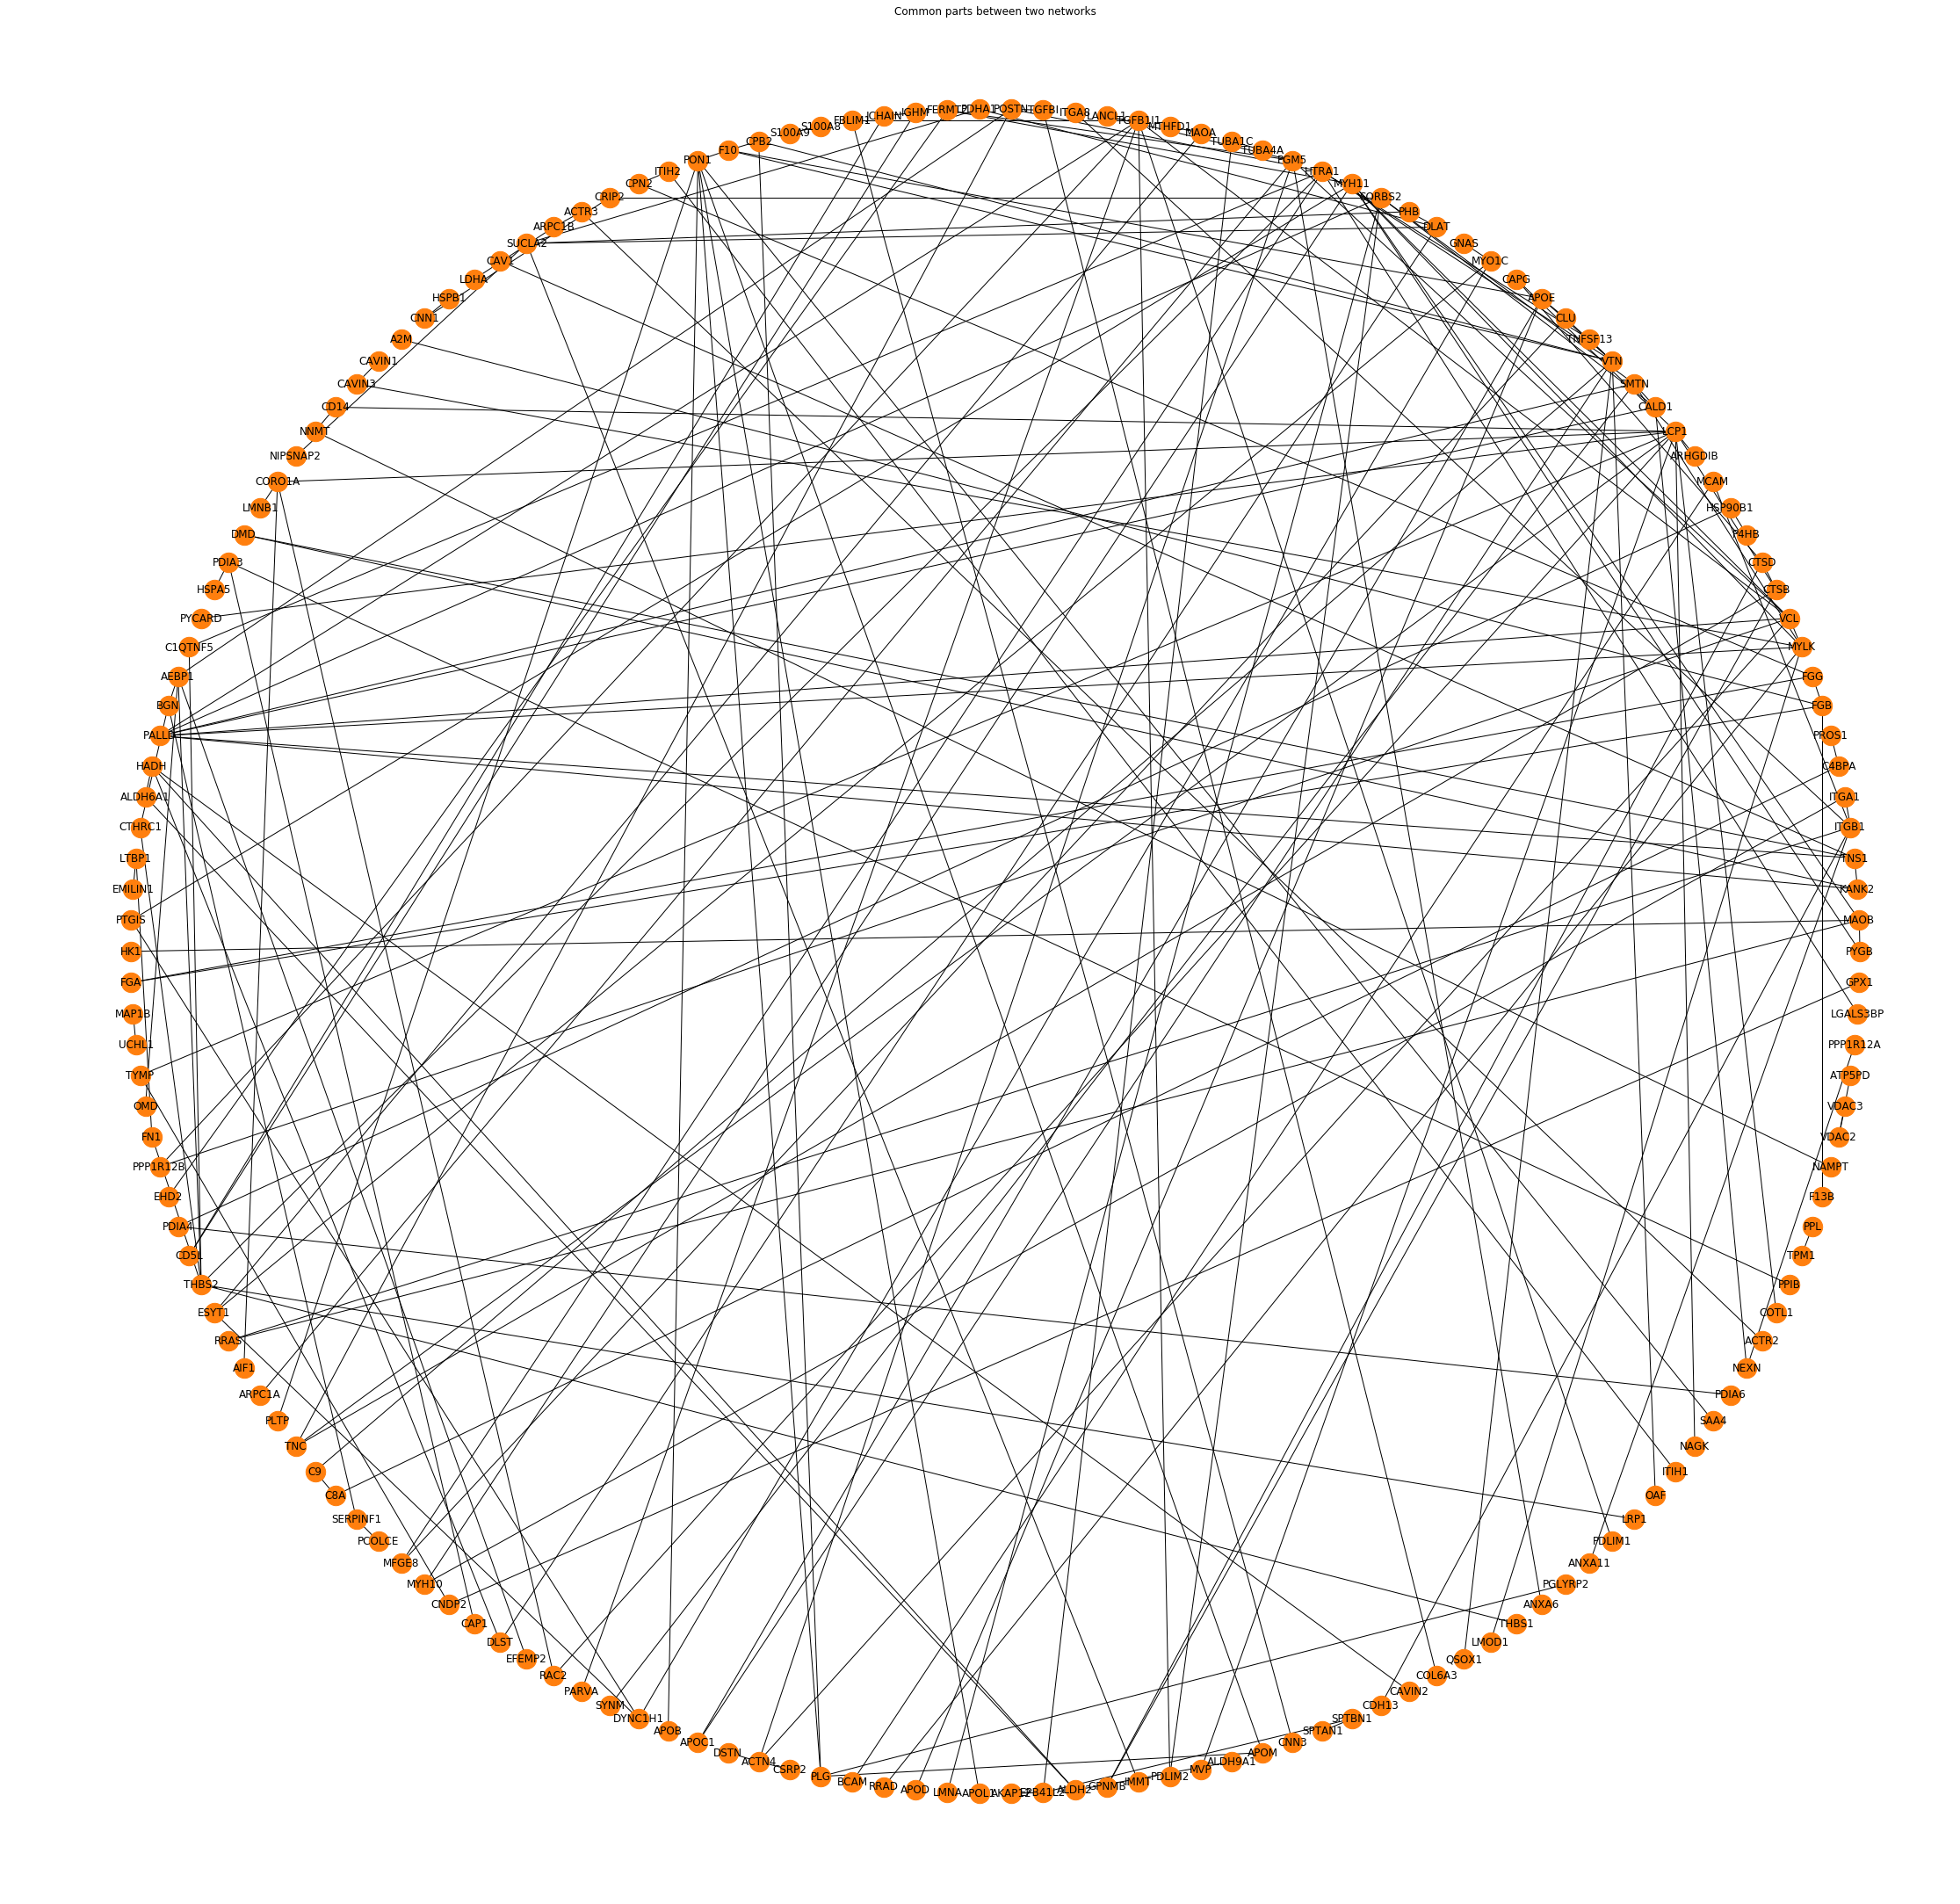

In [350]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming subgraph and subgraph2 are defined
common_edges = set(subgraph.edges()) & set(subgraph2.edges())

# Create a new graph from the common_edges
Common = nx.Graph()
Common.add_edges_from(common_edges)

# Count the number of nodes and edges in the graph and print the results
node_count = Common.number_of_nodes()
edge_count = Common.number_of_edges()
print("Number of nodes:", node_count)
print("Number of edges:", edge_count)

# Find the top 100 nodes with the most edges
top100_common_nodes = sorted(Common.degree, key=lambda x: x[1], reverse=True)[:100]
print("Top 100 nodes with the most edges:", top100_common_nodes)

# Save the top 100 nodes with the most edges to a CSV file
with open('task1_top100_common_nodes.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Node', 'Degree'])
    csv_writer.writerows(top100_common_nodes)

fig, ax = plt.subplots(figsize=(39, 39))
pos = nx.circular_layout(Common)
nx.draw(Common, pos, with_labels=True, node_color="tab:orange",node_size=500)
plt.title('Common parts between two networks')
plt.show()


In [351]:
# get the degree of each node in the Common graph
degrees = dict(Common.degree())

# sort the nodes by degree in descending order
sorted_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# select the top 20 nodes with the most edges
top_nodes = [node for node, degree in sorted_nodes[:20]]

# write the node IDs to a file
# with open("topnodes.txt", "w") as f:
#     for node in top_nodes:
#         f.write(str(node) + "\n")

Number of nodes: 220
Number of edges: 280


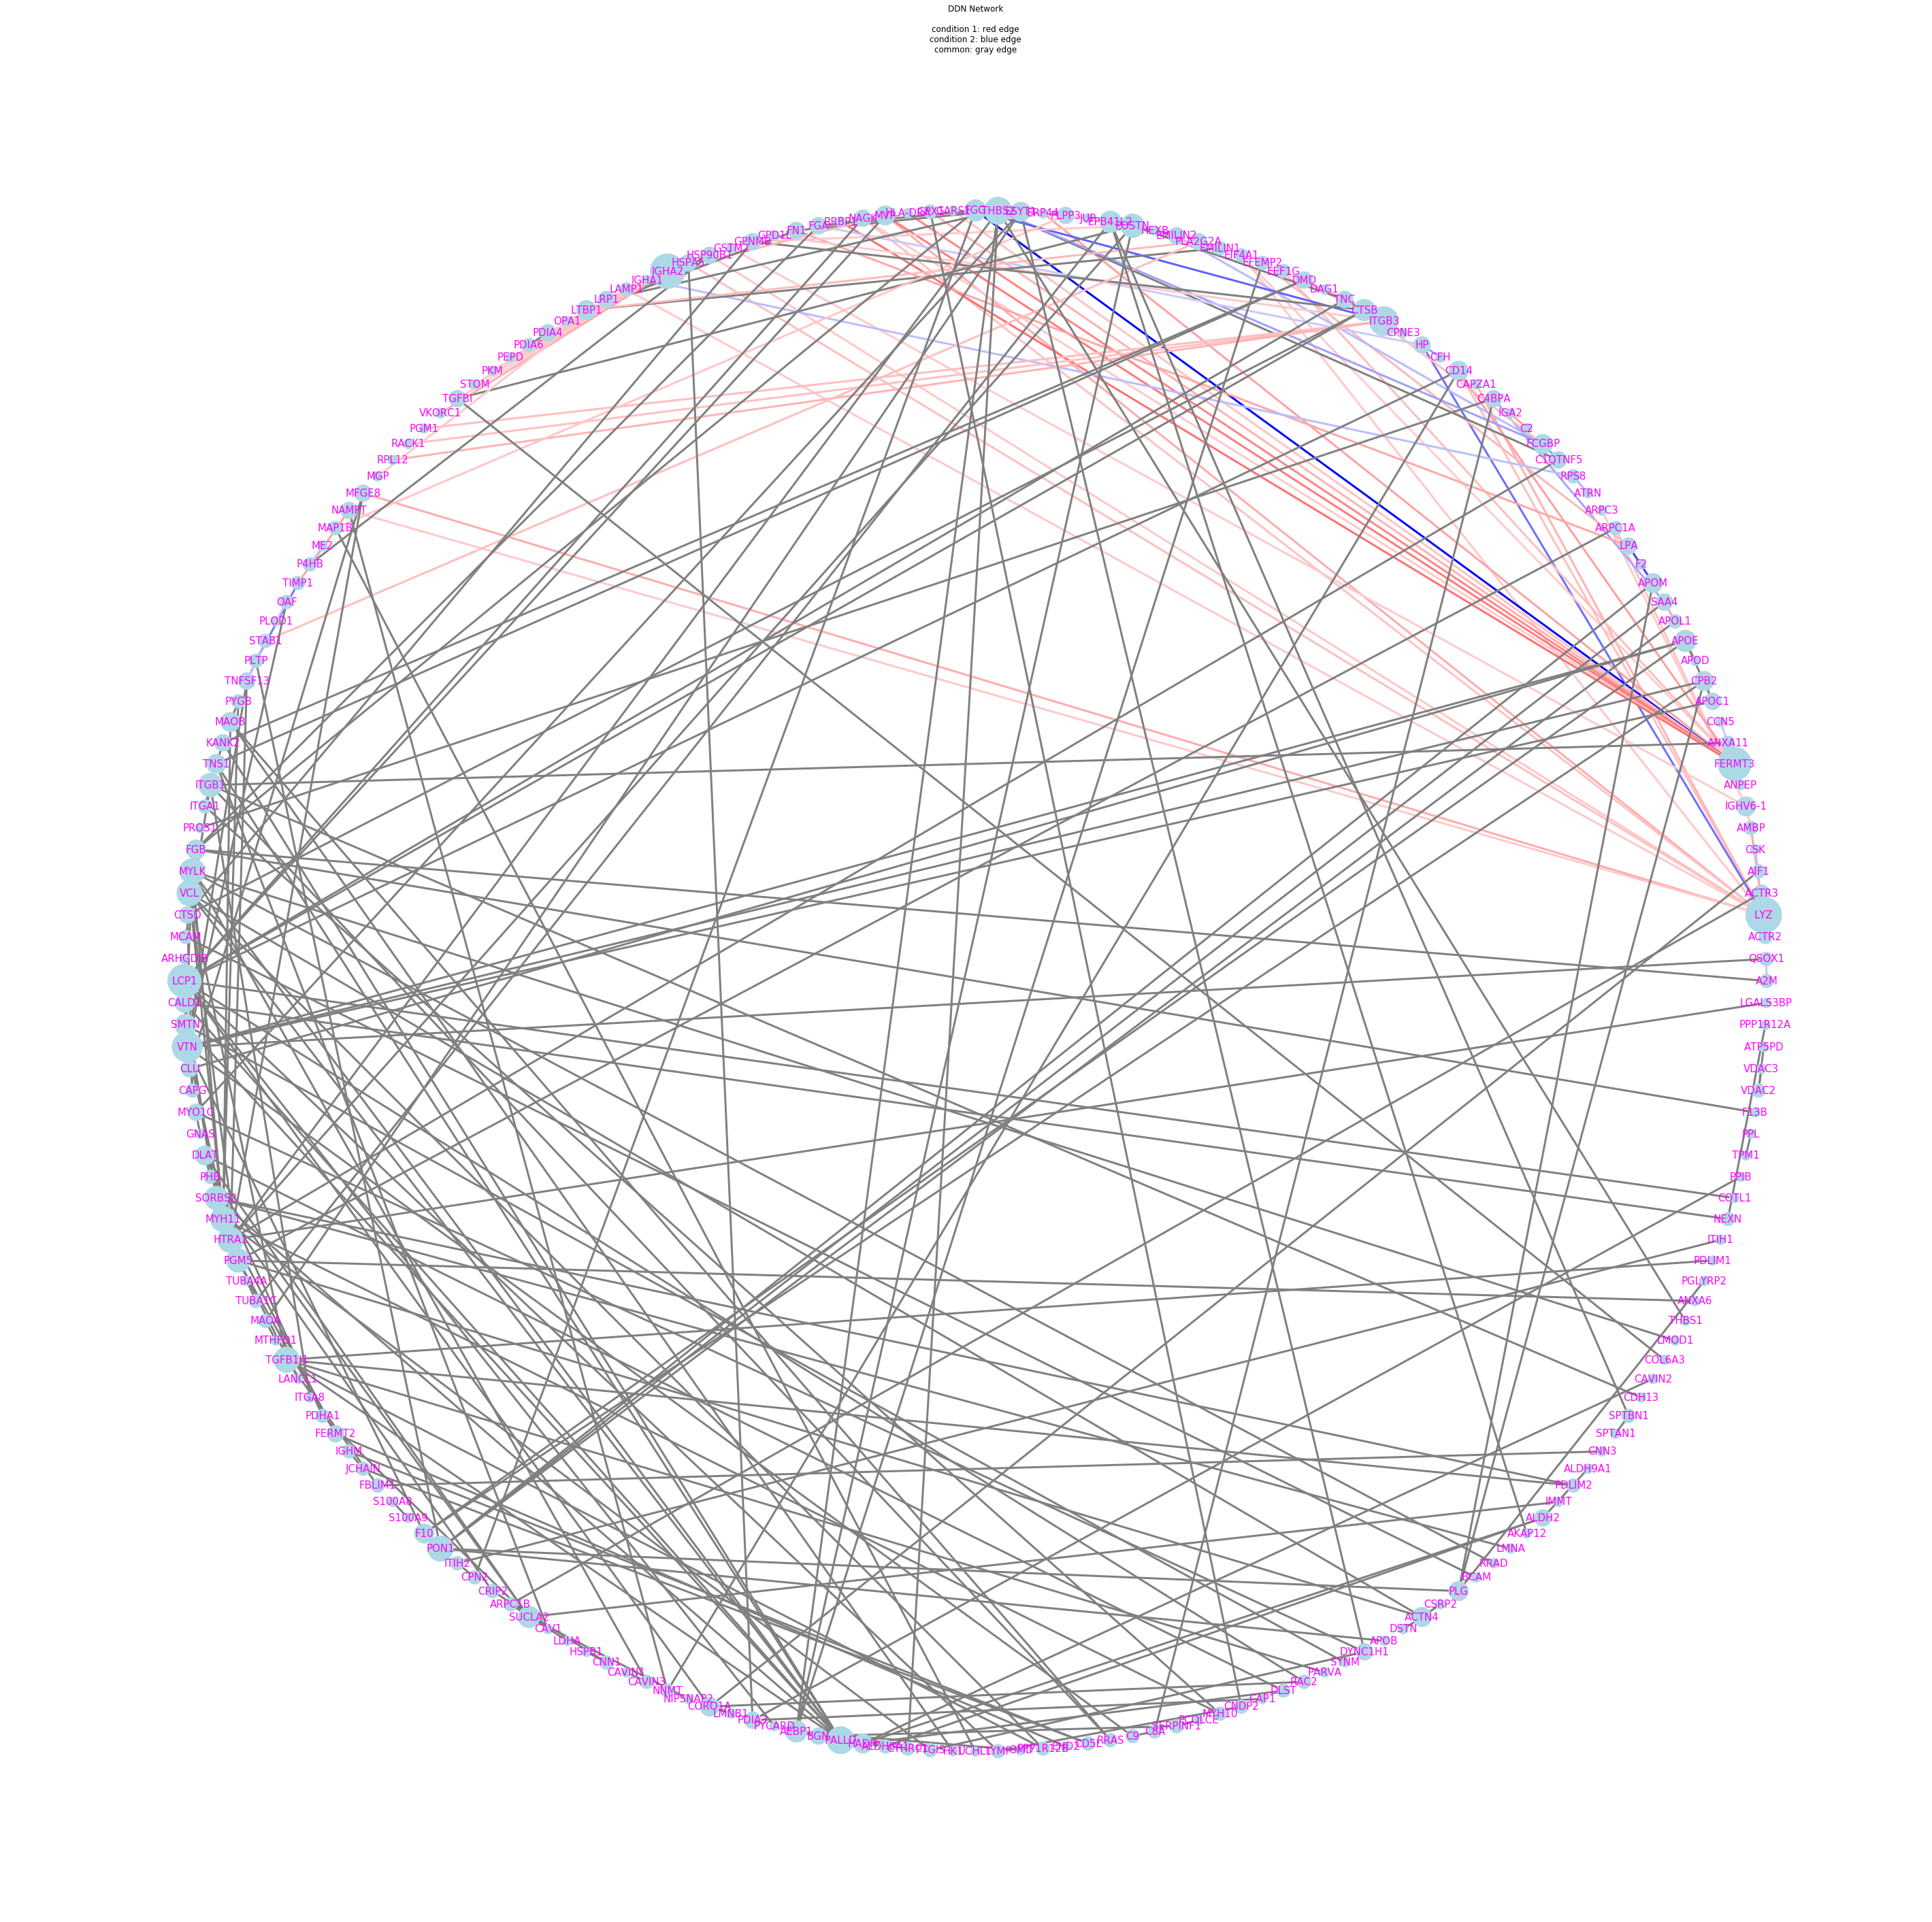

In [352]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

diffedges=neighbors
def plotDifferentialNetwork(diffedges, common_edges, maxalpha=1.0, minalpha=0.2):
    G = nx.Graph()
    color_condition = {'condition1': [1, 0, 0], 'condition2': [0, 0, 1], 'common': [0.5, 0.5, 0.5]}
    maxbeta = max([beta for _, _, _, beta in diffedges])

    for gene1, gene2, condition, beta in diffedges:
        if condition in color_condition:
            alpha = beta / maxbeta * (maxalpha - minalpha) + minalpha
            color = list(1 - (1 - np.array(color_condition[condition])) * alpha)
            G.add_edge(gene1, gene2, color=color)

    # Add common edges with green color
    for gene1, gene2 in common_edges:
        G.add_edge(gene1, gene2, color=color_condition['common'])
        # Count the number of nodes and edges in the graph and print the results
    
    node_count = G.number_of_nodes()
    edge_count = G.number_of_edges()
    print("Number of nodes:", node_count)
    print("Number of edges:", edge_count)

    pos = nx.circular_layout(G)
    edges = G.edges()
    edge_color = [G[u][v]['color'] for u, v in edges]
    node_size = [d * 200 for n, d in G.degree()]

    fig, ax = plt.subplots(figsize=(50, 50))
    nx.draw(G, pos=pos, node_color='lightblue', node_size=node_size,
            edges=edges, edge_color=edge_color, width=3,
            with_labels=True, font_size=15, font_weight='normal', font_color='magenta')

    ax.set_xlim((-1.2, +1.2))
    ax.set_ylim(ax.get_xlim())
    ax.set_title(''.join([
        'DDN Network\n',
        '\n',
        'condition 1: red edge\n',
        'condition 2: blue edge\n',
        'common: gray edge'
    ]))
    plt.show()

# Assuming diffedges, subgraph, and subgraph2 are defined
common_edges = set(subgraph.edges()) & set(subgraph2.edges())
plotDifferentialNetwork(diffedges, common_edges)
